In [87]:
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error


In [88]:
path = './'
df = pd.read_csv(path + 'student_grades.csv')

In [89]:
summary = df.describe()

In [90]:
summary

,student_id,exam1,exam2,exam3,final_grade
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,78.461538,77.307692,84.153846,81.692308
std,30.166206,14.284844,10.295703,8.714199,10.918122
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,26.750000,70.000000,70.000000,78.000000,72.000000
50%,52.500000,79.000000,75.000000,85.000000,81.000000
75%,78.250000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


In [91]:
summary.loc['iqr'] = summary.loc['75%']-summary.loc['25%']
summary

,student_id,exam1,exam2,exam3,final_grade
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,78.461538,77.307692,84.153846,81.692308
std,30.166206,14.284844,10.295703,8.714199,10.918122
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,26.750000,70.000000,70.000000,78.000000,72.000000
50%,52.500000,79.000000,75.000000,85.000000,81.000000
75%,78.250000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000
iqr,51.500000,22.000000,19.000000,16.000000,21.000000


/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWa

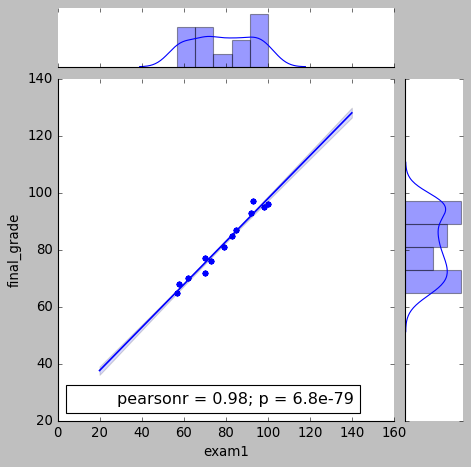

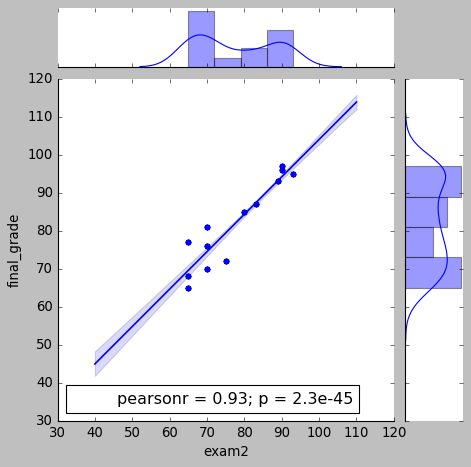

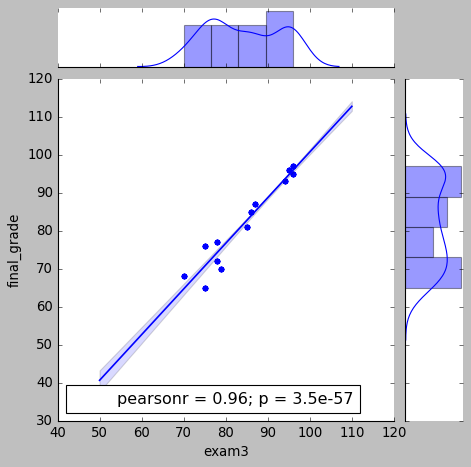

In [92]:
# Write a for loop to plot each of the 3 features 
#(exam 1, 2, & 3) with the final grade using a joint plot. 
#What can you say about each relationship 
#(using pearson's r and the p-value)

for i, col in enumerate(['exam1', 'exam2', 'exam3']):
    j = sns.jointplot(col, 'final_grade', data = df, kind='reg')
    j.annotate(stats.pearsonr)


### We can say from these plots that Exam1 has the strongest correlation to Final grade from pearsons r, and has the most statistical significance from the smallest p-value.

In [93]:
X = df.drop(['final_grade', 'student_id'], axis=1)
y = df[['final_grade']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [94]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


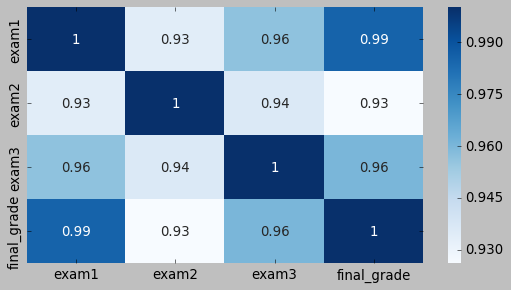

In [95]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

In [96]:
# plt.show() will remove the output data 
# regarding the parameters of the plot preceding the plot

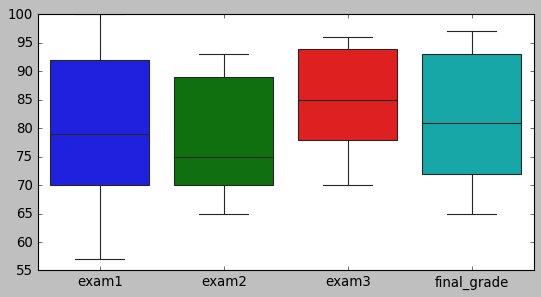

In [97]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['student_id']))

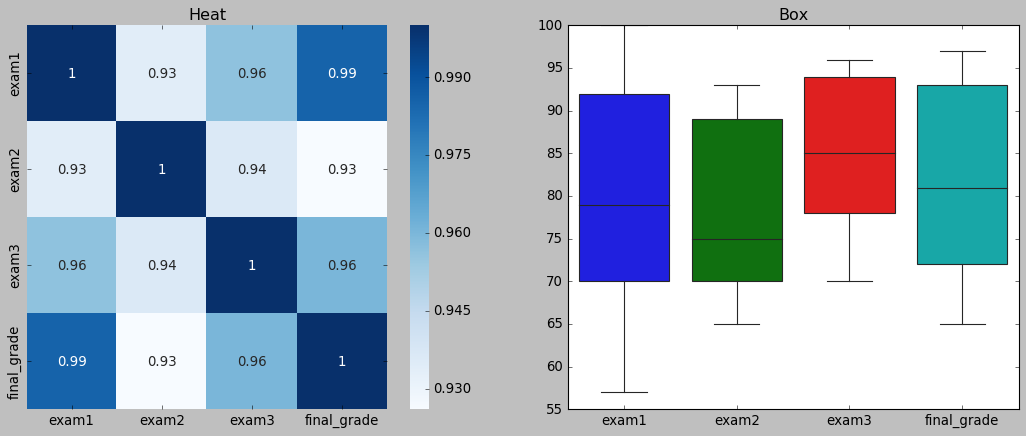

In [98]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Heat')
sns.heatmap(train.corr(), cmap='Blues', annot=True)
plt.subplot(1,2,2)
plt.title('Box')
sns.boxplot(data=df.drop(columns=['student_id']))
plt.show()

In [99]:
pearsonr(X_train[['exam1']], y_train)

(array([0.98548827]), array([3.67959731e-64]))

In [100]:
[[column, pearsonr(train[column], train.final_grade)] for column in X_train]

[['exam1', (0.9854882734738365, 3.679597306767771e-64)],
 ['exam2', (0.9260773842724218, 4.9387065956533756e-36)],
 ['exam3', (0.9604227932900589, 1.0003417783597307e-46)]]

In [101]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.final_grade) for col in column_names]

exam_final_corr_dict = dict(zip(column_names, r_and_p_values))
exam_final_corr_dict

{'exam1': (0.9854882734738365, 3.679597306767771e-64),
 'exam2': (0.9260773842724218, 4.9387065956533756e-36),
 'exam3': (0.9604227932900589, 1.0003417783597307e-46)}

In [102]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.103e+04
Date:                Tue, 19 Mar 2019   Prob (F-statistic):          3.76e-131
Time:                        14:47:01   Log-Likelihood:                -170.25
No. Observations:                  83   AIC:                             346.5
Df Residuals:                      80   BIC:                             353.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
exam1          0.4555      0.036     12.625      0.000       0.384       0.527
exam2         -0.0307      0.063     -0.486      0.629      -0.157       0.095
exam3          0.5728      0.049     11.633      0.000       0.475       0.671
==============================================================================
Omnibus:                       30.491   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.671
Skew:                           0.427   Prob(JB):                       0.0216
Kurtosis:                       1.780   Cond. No.                         51.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
lm1 = LinearRegression()
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [104]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [105]:
lm1.fit(X_train[['exam1']], y_train)
print(lm1)

lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[22.88211318]
[[0.74850854]]


In [106]:
y_pred_lm1 = lm1.predict(X_train[['exam1']])

In [108]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print(f'lm1 mse: {mse_lm1}')

lm1 mse: 3.3705570526495507


In [109]:
r2_lm1 = r2_score(y_train, y_pred_lm1)
print('  {:.2%} of the variance in the student''s final grade can be explained by the grade on the first exam.'.format(r2_lm1))

  97.12% of the variance in the students final grade can be explained by the grade on the first exam.


In [110]:
lm2 = LinearRegression()
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [111]:
lm2.fit(X_train[['exam1','exam3']], y_train)
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [112]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [113]:
lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coefficients = lm2.coef_
print(lm2_coefficients)

[12.79518052]
[[0.59709165 0.26106586]]


In [117]:
y_pred_lm2 = lm2.predict(X_train[['exam1', 'exam3']])

In [118]:
mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print(f'mse lm2: {mse_lm2}')

mse lm2: 2.9392841490741533


In [119]:
r2_lm2 = r2_score(y_train, y_pred_lm2)
print('  {:.2%} of the variance in the student''s final grade can be explained by the grades on exam 1 and 3.'.format(r2_lm2))

  97.49% of the variance in the students final grade can be explained by the grades on exam 1 and 3.


## 1.d:

### We can see here that lm2 has a higher r2 as well as a smaller mse, suggesting that it is a superior model to r1. Let us contemplate lm3, a model based solely on exam3.

## 1.e: 

In [120]:
lm3 = LinearRegression()
print(lm3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [122]:
lm3.fit(X_train[['exam3']], y_train)
print(lm3)

lm3_y_intercept = lm3.intercept_
print(lm3_y_intercept)

lm3_coefficient = lm3.coef_
print(lm3_coefficient)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[-19.62667326]
[[1.20315159]]


In [123]:
y_pred_lm3 = lm3.predict(X_train[['exam3']])

In [124]:
mse_lm3 = mean_squared_error(y_train, y_pred_lm3)
print(f'mse lm3: {mse_lm3}')

r2_lm3 = r2_score(y_train, y_pred_lm3)
print('  {:.2%} of the variance in the student''s final grade can be explained by the grade on the third exam.'.format(r2_lm3))


mse lm3: 9.076327400355774
  92.24% of the variance in the students final grade can be explained by the grade on the third exam.


## 1.f:

### Our mse is significantly higher than on either of the previous two models.  Our r2 is also significantly lower.  Inclusion of exam3 as a feature to build a model bolsters the data from exam1 alone, but by itself is not a useful model compared to the other two we have used.

## 1.g: Predict final grades of the out-of-sample data (test dataframe) and evaluate results.

mean squared error for lm2 on test data: 3.421946649723411
mean squared error for lm1 on test data: 4.745984061548995
mean squared error for lm3 on test data: 12.141629482949778
97.20% of the variance in the students final grade can be explained by the grades on the first 3 exams.
96.12% of the variance in the students final grade can be explained by the grades on the first exam.
90.07% of the variance in the students final grade can be explained by the grades on the 3rd exam alone.


Text(0, 0.5, 'Residuals')

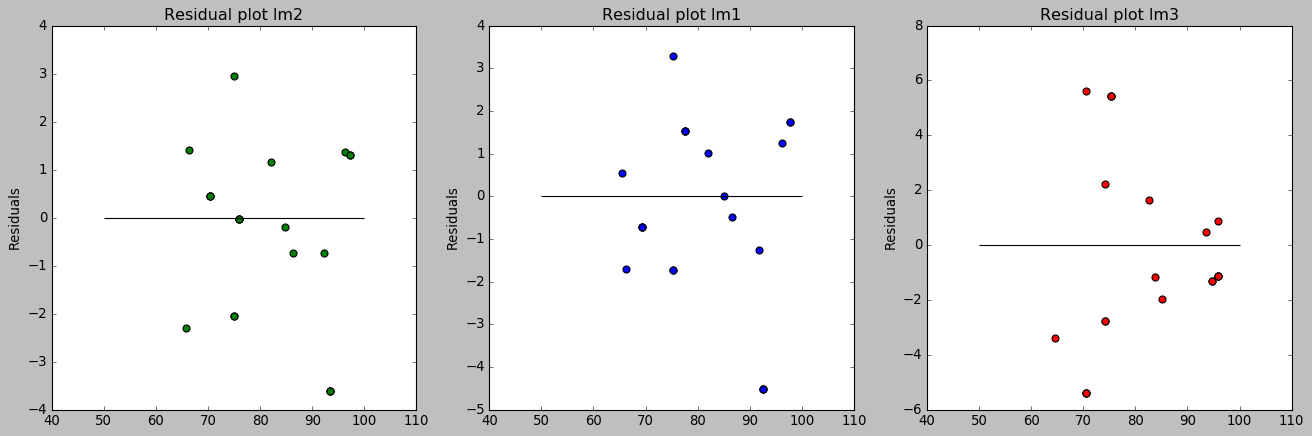

In [137]:
# Let's first re-evaluate our lm2 model on our test data set:

y_pred_lm2 = lm2.predict(X_test[['exam1', 'exam3']])
y_pred_lm1 = lm1.predict(X_test[['exam1']])
y_pred_lm3 = lm3.predict(X_test[['exam3']])


mse_lm2_tst = mean_squared_error(y_test, y_pred_lm2)
print(f'mean squared error for lm2 on test data: {mse_lm2_tst}')

mse_lm1_tst = mean_squared_error(y_test, y_pred_lm1)
print(f'mean squared error for lm1 on test data: {mse_lm1_tst}')

mse_lm3_tst = mean_squared_error(y_test, y_pred_lm3)
print(f'mean squared error for lm3 on test data: {mse_lm3_tst}')

r2_lm2_tst = r2_score(y_test, y_pred_lm2)
print('{:.2%} of the variance in the student''s final grade can be explained by the grades on the first 3 exams.'
      .format(r2_lm2_tst))

r2_lm1_tst = r2_score(y_test, y_pred_lm1)
print('{:.2%} of the variance in the student''s final grade can be explained by the grades on the first exam.'
      .format(r2_lm1_tst))

r2_lm3_tst = r2_score(y_test, y_pred_lm3)
print('{:.2%} of the variance in the student''s final grade can be explained by the grades on the 3rd exam alone.'
      .format(r2_lm3_tst))





plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.scatter(y_pred_lm2, y_pred_lm2 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot lm2")
plt.ylabel('Residuals')

plt.subplot(1,3,2)
plt.scatter(y_pred_lm1, y_pred_lm1 - y_test, c='b', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot lm1")
plt.ylabel('Residuals')

plt.subplot(1,3,3)
plt.scatter(y_pred_lm3, y_pred_lm3 - y_test, c='r', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot lm3")
plt.ylabel('Residuals')


### 1h. Which model performs the bet, based on the 2 out-of-sample evaluation results (the example one, lm1, and lm3)?

a: predictably, lm2 still performs the best on the test data as it did on the train.  We can note a lower mse and a higher r2 on the test data despite slightly lower overall strength. (which makes sense because the model was built on the train data, not the test)

Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

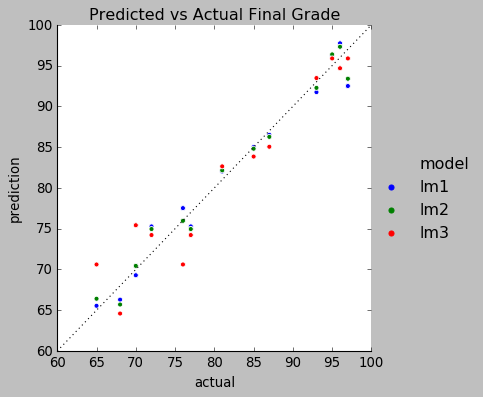

In [145]:
pd.DataFrame({'actual': y_test.final_grade,
              'lm1': y_pred_lm1.ravel(),
              'lm2': y_pred_lm2.ravel(),
              'lm3': y_pred_lm3.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.ylim(60, 100)
plt.xlim(60, 100)
plt.title('Predicted vs Actual Final Grade')
